In [1]:
#Importing Required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Disolaying the dataset
df= pd.read_csv("E:\Data set\Flightprice Data set.csv")
df.head()

,Unnamed: 0,Airline,Flight_Name,Arrival,Departure,Source,Destination,Duration,Stops,Meals_Avilablity,Price
0,1,Go First,G8-323,15:00,17:00,New Delhi,Mumbai,2h 00m,Non Stop,Paid Meal,7320
1,2,Go First,G8-329,6:00,8:00,Mumbai,New Delhi,2h 00m,Non Stop,Paid Meal,7308
2,3,Go First,G8-385,5:45,7:20,Bangalore,Mumbai,1h 35m,Non Stop,Paid Meal,6333
3,4,Go First,G8-317,6:05,7:40,Mumbai,Bangalore,1h 35m,Non Stop,Paid Meal,6258
4,5,Go First,G8-424/336,8:45,16:35,Hyderabad,Mumbai,7h 50m,1 Stop,Paid Meal,5292


In [3]:
# Checking the shape of the dataset
df.shape

(1677, 11)

In [4]:
# Checking the complete information of dataset and Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1677 non-null   int64 
 1   Airline           1677 non-null   object
 2   Flight_Name       1677 non-null   object
 3   Arrival           1677 non-null   object
 4   Departure         1677 non-null   object
 5   Source            1677 non-null   object
 6   Destination       1677 non-null   object
 7   Duration          1677 non-null   object
 8   Stops             1677 non-null   object
 9   Meals_Avilablity  1677 non-null   object
 10  Price             1677 non-null   int64 
dtypes: int64(2), object(9)
memory usage: 144.2+ KB


In [5]:
# Dropping the unwanted columns
df = df.drop(columns = ['Unnamed: 0'])

In [6]:
# Checking the null values in the dataset
df.isnull().sum()

Airline             0
Flight_Name         0
Arrival             0
Departure           0
Source              0
Destination         0
Duration            0
Stops               0
Meals_Avilablity    0
Price               0
dtype: int64

In [7]:
df['Price'] = df['Price'].astype('int')

<AxesSubplot:xlabel='Airline', ylabel='Price'>

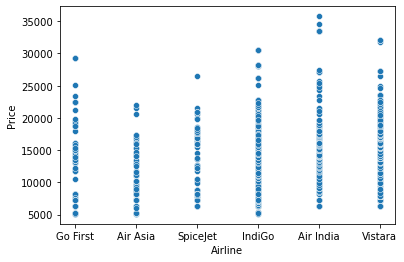

In [8]:
# Checking the relation between Airline and price using scatter plot
sns.scatterplot(x = 'Airline',y = 'Price',data = df)

<AxesSubplot:xlabel='Source', ylabel='Price'>

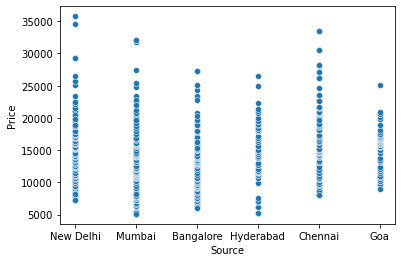

In [9]:
# Checking the relation between Source and price using scatter plot
sns.scatterplot(x = 'Source',y = 'Price',data = df)

<AxesSubplot:xlabel='Destination', ylabel='Price'>

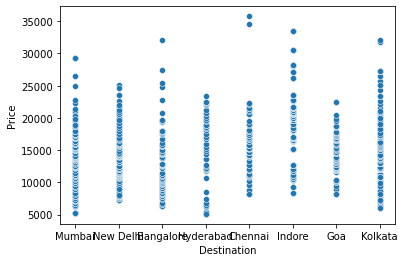

In [10]:
# Checking the relation between Destination and price using scatter plot
sns.scatterplot(x = 'Destination',y = 'Price',data = df)

<AxesSubplot:xlabel='Stops', ylabel='Price'>

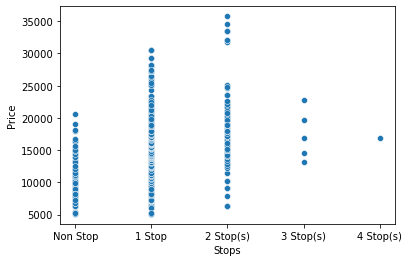

In [11]:
# Checking the relation between Stops and price using scatter plot
sns.scatterplot(x = 'Stops',y = 'Price',data = df)

<AxesSubplot:xlabel='Meals_Avilablity', ylabel='Price'>

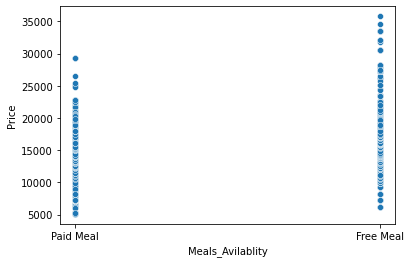

In [12]:
# Checking the relation between Meals_Avilablity and price using scatter plot
sns.scatterplot(x = 'Meals_Avilablity',y = 'Price',data = df)

In [13]:
# Assign Label Encoder
le = LabelEncoder()

In [14]:
# Transforming the Airline categorical data into numerical data using Label Encoder
df1 = le.fit_transform(df['Airline'])
pd.Series(df1)
df['Airline'] = df1

In [15]:
# Checking the Airline values counts
df.Airline.value_counts()

5    551
3    500
1    252
2    159
0    109
4    106
Name: Airline, dtype: int64

In [16]:
# Transforming the Flight_Name categorical data into numerical data using Label Encoder
df2 = le.fit_transform(df['Flight_Name'])
pd.Series(df2)
df['Flight_Name'] = df2

In [17]:
# Checking the Flight_Name values counts
df.Flight_Name.value_counts()

213     4
442     4
341     4
257     4
1206    4
       ..
527     1
526     1
525     1
524     1
1529    1
Name: Flight_Name, Length: 1530, dtype: int64

In [18]:
#Splitting the Arrival column into hours and minutes and dropping the Arrival time column
df['Arrival_Hour'] = pd.to_datetime(df['Arrival']).dt.hour
df['Arrival_min'] = pd.to_datetime(df['Arrival']).dt.minute
df.drop(['Arrival'],axis = 1, inplace = True)

In [19]:
#Splitting the Departure column into hours and minutes and dropping the Departure time column
df['Dep_Hour'] = pd.to_datetime(df['Departure']).dt.hour
df['Dep_min'] = pd.to_datetime(df['Departure']).dt.minute
df.drop(['Departure'],axis = 1, inplace = True)

In [20]:
# Transforming the Source categorical data into numerical data using Label Encoder
df3 = le.fit_transform(df['Source'])
pd.Series(df3)
df['Source'] = df3

In [21]:
# Checking the Source values counts
df.Source.value_counts()

5    497
4    458
1    290
0    253
2     96
3     83
Name: Source, dtype: int64

In [22]:
# Transforming the Destination categorical data into numerical data using Label Encoder
df4 = le.fit_transform(df['Destination'])
pd.Series(df4)
df['Destination'] = df4

In [23]:
# Checking the Destination values counts
df.Destination.value_counts()

6    376
5    351
7    345
4    188
2    133
0    131
1     93
3     60
Name: Destination, dtype: int64

In [24]:
#Splitting the duration columns into hours and minutes
f = pd.to_timedelta(df['Duration'])
df['hours'] = f.dt.components['hours']
df['minute'] = f.dt.components['minutes']

In [25]:
#Dropping the columns Duration
df = df.drop(columns =['Duration'])

In [26]:
# Checking the Stops values counts
df.Stops.value_counts()

1 Stop       1186
Non Stop      273
2 Stop(s)     212
3 Stop(s)       5
4 Stop(s)       1
Name: Stops, dtype: int64

In [27]:
#Splitting the total_stops in 1 stops 2 stops etc
df['Stops'] = df['Stops'].replace({'Non Stop':0,'1 Stop':1,'2 Stop(s)' : 2,'3 Stop(s)': 3,'4 Stop(s)': 4})

In [28]:
# Transforming the Meals_Avilablity categorical data into numerical data using Label Encoder
df5 = le.fit_transform(df['Meals_Avilablity'])
pd.Series(df5)
df['Meals_Avilablity'] = df5

In [29]:
# Checking the Meals_Avilablity values counts
df.Meals_Avilablity.value_counts()

1    1166
0     511
Name: Meals_Avilablity, dtype: int64

In [30]:
df.head()

,Airline,Flight_Name,Source,Destination,Stops,Meals_Avilablity,Price,Arrival_Hour,Arrival_min,Dep_Hour,Dep_min,hours,minute
0,2,723,5,6,0,1,7320,15,0,17,0,2,0
1,2,732,4,7,0,1,7308,6,0,8,0,2,0
2,2,775,0,6,0,1,6333,5,45,7,20,1,35
3,2,711,4,0,0,1,6258,6,5,7,40,1,35
4,2,795,3,6,1,1,5292,8,45,16,35,7,50


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677 entries, 0 to 1676
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Airline           1677 non-null   int32
 1   Flight_Name       1677 non-null   int32
 2   Source            1677 non-null   int32
 3   Destination       1677 non-null   int32
 4   Stops             1677 non-null   int64
 5   Meals_Avilablity  1677 non-null   int32
 6   Price             1677 non-null   int32
 7   Arrival_Hour      1677 non-null   int64
 8   Arrival_min       1677 non-null   int64
 9   Dep_Hour          1677 non-null   int64
 10  Dep_min           1677 non-null   int64
 11  hours             1677 non-null   int64
 12  minute            1677 non-null   int64
dtypes: int32(6), int64(7)
memory usage: 131.1 KB


In [32]:
# Checking the complete description of data set the counts, mean value,standard Deviation etc
df.describe()

,Airline,Flight_Name,Source,Destination,Stops,Meals_Avilablity,Price,Arrival_Hour,Arrival_min,Dep_Hour,Dep_min,hours,minute
count,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000
mean,3.129994,752.602862,3.010137,4.601670,0.971377,0.695289,13415.011330,12.940370,25.754323,13.915921,28.312463,8.196780,26.958855
std,1.625729,445.627932,1.888735,2.168047,0.553049,0.460422,5342.717701,5.563156,18.052079,6.584731,17.493167,5.913712,17.018875
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5102.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,353.000000,1.000000,4.000000,1.000000,0.000000,8323.000000,8.000000,10.000000,8.000000,15.000000,3.000000,10.000000
50%,3.000000,751.000000,4.000000,5.000000,1.000000,1.000000,12990.000000,13.000000,25.000000,15.000000,30.000000,7.000000,25.000000
75%,5.000000,1164.000000,5.000000,6.000000,1.000000,1.000000,16762.000000,18.000000,45.000000,20.000000,45.000000,11.000000,40.000000
max,5.000000,1529.000000,5.000000,7.000000,4.000000,1.000000,35775.000000,23.000000,55.000000,23.000000,55.000000,23.000000,55.000000


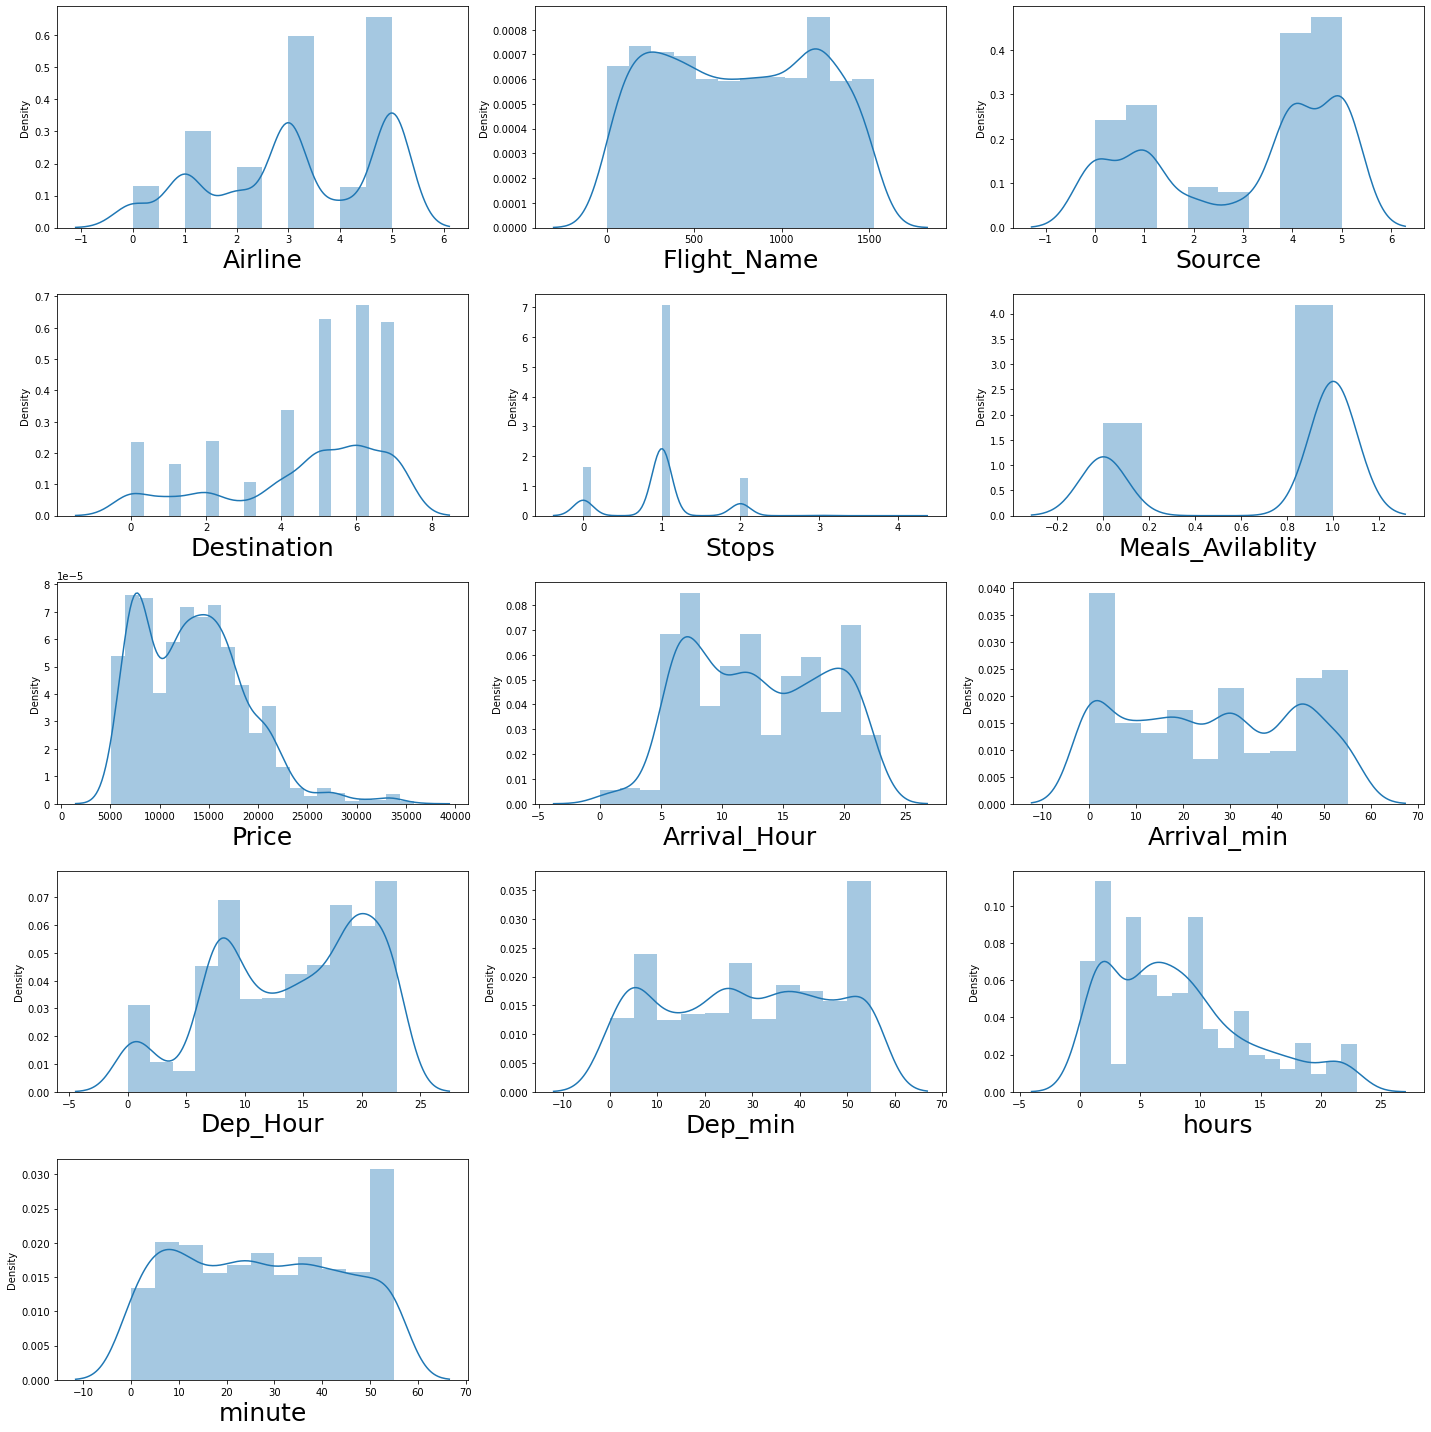

In [33]:
## distribution plot to check the data distribition
plt.figure(figsize = (20,20))
plt_num =1

for column in df:
    if plt_num<=13:
        sx = plt.subplot(5,3,plt_num)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 25)
    plt_num+=1
plt.tight_layout()

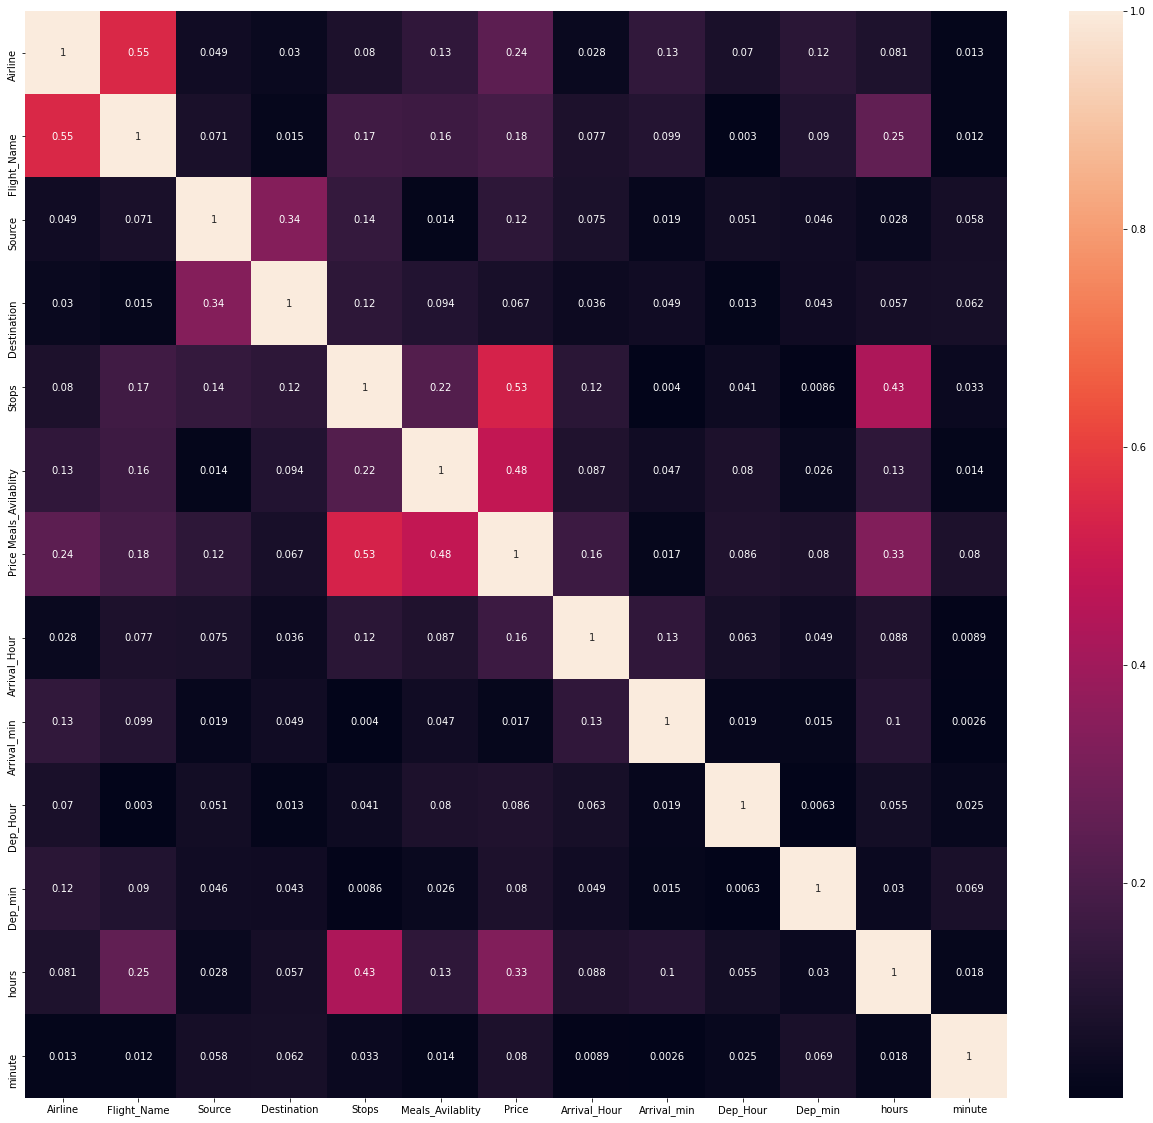

In [34]:
#Checking the relation between the features co-relation
df_corr = df.corr().abs()
plt.figure(figsize = (22,20))
sns.heatmap(df_corr,annot = True,annot_kws = {'size':10})
plt.show()

In [35]:
#Splitting features and Labels
x = df.drop(columns = ['Price'])
y = df['Price']

In [36]:
x.head()

,Airline,Flight_Name,Source,Destination,Stops,Meals_Avilablity,Arrival_Hour,Arrival_min,Dep_Hour,Dep_min,hours,minute
0,2,723,5,6,0,1,15,0,17,0,2,0
1,2,732,4,7,0,1,6,0,8,0,2,0
2,2,775,0,6,0,1,5,45,7,20,1,35
3,2,711,4,0,0,1,6,5,7,40,1,35
4,2,795,3,6,1,1,8,45,16,35,7,50


In [37]:
y.head()

0    7320
1    7308
2    6333
3    6258
4    5292
Name: Price, dtype: int32

In [38]:
##Transforming the dataset into standard form using StandardScaler
sc = StandardScaler()
x_sc = sc.fit_transform(x,y)

In [39]:
##splitting into training and testing data
x_train,x_test,y_train,y_test = train_test_split(x_sc,y,test_size = 0.20,random_state = 392)

In [40]:
# Checking the Multi_colinearity between the features using variance inflation factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_sc,i) for i in range(x_sc.shape[1])]
vif['features'] = x.columns

In [41]:
# displaying the values of features variance 
vif

,vif,features
0,1.514406,Airline
1,1.596361,Flight_Name
2,1.226572,Source
3,1.212495,Destination
4,1.389279,Stops
5,1.109218,Meals_Avilablity
6,1.078715,Arrival_Hour
7,1.051449,Arrival_min
8,1.024342,Dep_Hour
9,1.025429,Dep_min


In [42]:
#Linear Regression
lr = LinearRegression()

In [43]:
#Fitting the x_train and Y_train into Linear Regression
lr.fit(x_train,y_train)

LinearRegression()

In [44]:
# Checking the linear regression Model accuracy
lr.score(x_train,y_train)

0.47519467830050566

In [45]:
# Checking the linear regression Model accuracy
lr.score(x_test,y_test)

0.4893213698274238

In [46]:
# Predicting the Linear Regression values
y_pred = lr.predict(x_test)
y_pred

array([11527.7781597 ,  9377.52481579, 13106.15662887, 11170.096918  ,
        7653.60071368, 15330.12516577, 22846.45602958, 14712.2534351 ,
       13359.8084745 , 11908.68680778,  8633.06483192, 10239.94910593,
       16477.85405097, 11946.3723419 , 16199.15711329, 16046.82064934,
       10886.9397449 ,  7086.75156155, 15811.50704821, 13269.98221703,
        7875.07656125, 16400.22999196, 13153.39084509,  9213.34322753,
        8092.6403548 , 14574.9043276 , 16856.44260297, 16552.82717211,
        7441.70273051, 17288.05022961, 12473.0247818 , 14166.85238869,
        9943.68335365, 14066.51466506, 15111.42255911,  8843.11649516,
       16461.34702484, 11953.79426327,  6694.0519771 , 14924.61276507,
       18959.77176753, 12462.98413044, 15017.05586347, 10565.45574789,
       11014.72665447, 13500.42960717, 13658.57749603, 12716.62238415,
       13195.60842831, 12902.56246831, 15215.17315415, 15524.80991369,
       13721.79751335, 17941.51756504, 11593.85964625,  6863.83855216,
      

In [47]:
mean_absolute_error(y_test,y_pred)

2798.2568216700156

In [48]:
# Mean squared error for checking model error
mean_squared_error(y_test,y_pred)

12968079.336699257

In [49]:
np.sqrt(mean_squared_error(y_test,y_pred))

3601.121955266061

In [50]:
#Lasso CV 
lacv = LassoCV(alphas = None, max_iter = 1000,normalize = True)
lacv.fit(x_train,y_train)

LassoCV(normalize=True)

In [51]:
#alpha
alpha = lacv.alpha_
alpha

0.07750643891851006

In [52]:
#Lasso for model accuracy
las_lr = Lasso(alpha)
las_lr.fit(x_train,y_train)

Lasso(alpha=0.07750643891851006)

In [53]:
#Lasso Score 
las_lr.score(x_test,y_test)

0.4893257873935938

In [54]:
#RidgeCV score 
ridcv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize = True)
ridcv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [55]:
ridcv.alpha_

0.020999999999999998

In [56]:
rd = Ridge(alpha = ridcv.alpha_)
rd.fit(x_train,y_train)

Ridge(alpha=0.020999999999999998)

In [57]:
rd.score(x_test,y_test)

0.4893213974054742

In [58]:
# KNeighorsRegressor
knn = KNeighborsRegressor()

In [59]:
#Fitting the x_train and Y_train into KNeighborsRegression
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [60]:
# Checking the KNeighborsRegression model score
knn.score(x_train,y_train)

0.6894883708157572

In [61]:
# Checking the KNeighborsRegression model score
knn.score(x_test,y_test)

0.528990170525693

In [62]:
#predicting the value
y_pred = knn.predict(x_test)
y_pred

array([10562.8,  8572.8,  8886.8, 12306.2,  7425. , 16151.8, 19630.4,
       12865.4, 10335.8, 13955. ,  5885.2, 10255.6, 17107.2, 11869. ,
       19426.8, 13791. , 10667.6, 10102.2, 17945.2, 10559.8,  7315.2,
       15763.6, 10698.6, 10859.2,  7399.2, 14657.6, 16674.4, 19759.8,
        7315.2, 15005.4, 10481.6, 14883. , 10909.8, 10788. , 16794.8,
        8481.8, 12918.6,  9525. ,  7543.8, 10068.6, 16138.6, 10484.4,
       14883. ,  9330. , 13146. , 13741.4, 17103.6, 17506.6, 15391.2,
       10974. , 17244.8, 14436. , 12876. , 12829.6, 14269.6,  8738. ,
       13405.2, 10801.8, 11276.8, 14841.8, 19759.8, 13463.6,  6101.6,
       12712.8, 13351.4,  9016.2,  8340.4, 10467.6, 13848.6, 11098.4,
       11645.8, 12811.4, 14686.4, 15708.6,  9252. ,  8470.2, 17011.2,
       14634.6, 16631.2, 14579. , 13704. , 16261.4,  8362.8, 15311.4,
       17128.8, 22778.6,  7210.8, 16440.8, 21506.2, 10506.2, 13694.4,
       13041. , 17212.6, 17344.2,  9378.2, 12200. , 12313.4, 11558.8,
       19962. , 1000

In [63]:
# DecisionTreeRegressor
dtr = DecisionTreeRegressor()

In [64]:
#Fitting the x_train and Y_train into DecisionTreeRegressor
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [65]:
# Checking the DecisionTreeRegressor model score
dtr.score(x_train,y_train)

1.0

In [66]:
# Checking the DecisionTreeRegressor model score
dtr.score(x_test,y_test)

0.4958215188223697

In [67]:
#predicting the value
y_pred = dtr.predict(x_test)
y_pred

array([ 6333.,  8358.,  6333., 15090.,  7320., 16350., 20659., 12990.,
       11373., 13793.,  6238., 12045., 16350.,  6258., 19070., 15712.,
        8160., 10712., 18765., 12914.,  7308., 14028., 14775.,  5294.,
        7320., 17549.,  9277., 27198.,  7308., 16309.,  8160., 14520.,
        8087., 12138., 19712., 12352., 13285.,  6333.,  6258., 14703.,
       16729., 15090., 14520.,  8148.,  9515.,  8160., 15090., 11478.,
       22087.,  8160., 11508.,  9277., 14250., 14520., 12033.,  9978.,
       24791.,  8769.,  8896., 14396., 27198., 16113.,  7308.,  9536.,
       22087., 10785.,  7308.,  7320.,  7308., 13001., 14775.,  9904.,
       13188., 16803.,  7320.,  7308., 15067., 22087., 16980., 13798.,
       22087., 17243., 12558., 14028., 17168., 28195.,  7131., 14028.,
       21685., 12172., 12718., 15813., 15090., 21600., 13069., 12200.,
        9536., 12138., 19962.,  8160., 17925.,  8790., 16204., 19815.,
       16919., 15712., 14606.,  8160., 15615., 15288.,  5102.,  9277.,
      

In [68]:
## As we seen the there is no overfitting model for this regression model we used three Algorithm

#LinearRegression got 49%Accuracy
#KNeighborsRegressor got the same 65% Accuracy
#DecisionTreeRegressor got the accuracy 49% Accuracy